<a href="https://colab.research.google.com/github/ChiNonsoHenry16/Comparative_Study_of_CNN_for_Yam_Disease_Classification/blob/main/Simulating_Mechanical_Damage_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MECHANICAL DAMAGES - MD is not actually a disease—it's a category meant to tell the farmer, that "this isn’t a real disease, but mechanical injury". Its just another factor that comes into play when trying to classify leaf diseases. Its just a way to tell the farmer that this issue is not actually a disease but a damage caused by factors in a farm.


From applying of VGG 16 and other CNN architectures, it showed that MD requires strong augumentation to improve accuracies. Notice that MD is 0.00 for precision, recall, f1-score and its AUC is lower (0.67) than other classess.


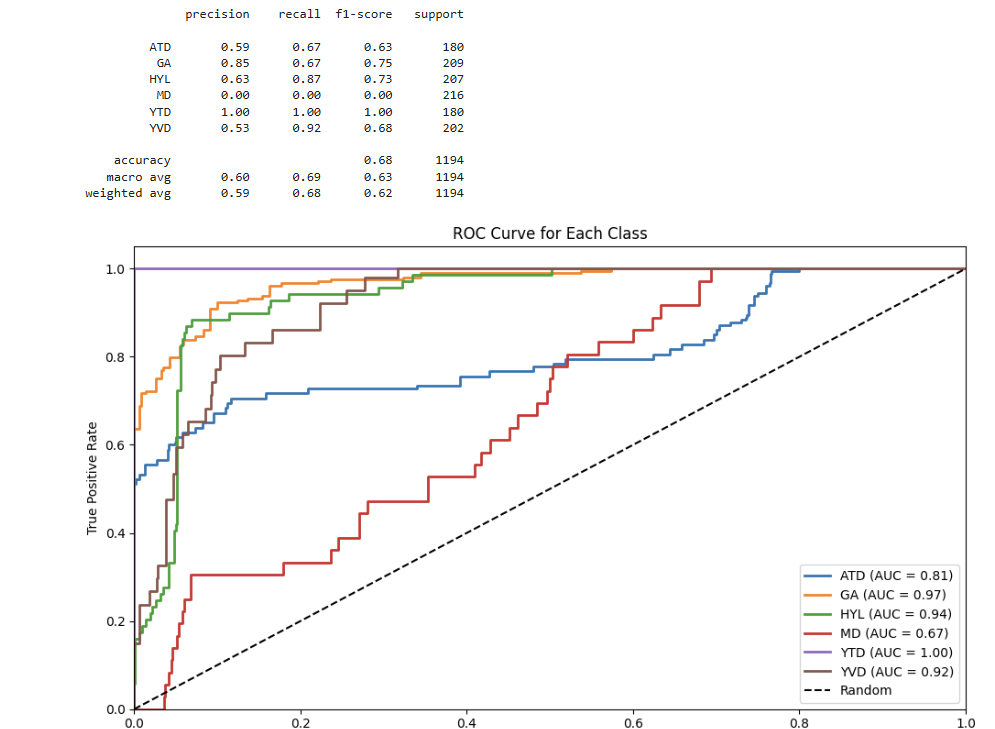

In [2]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  Import Libraries
import cv2
import numpy as np
import os
from glob import glob
import random
from tqdm.notebook import tqdm

# Damage Functions
def add_random_line(img):
    h, w = img.shape[:2]
    pt1 = (random.randint(0, w - 1), random.randint(0, h - 1))
    pt2 = (random.randint(0, w - 1), random.randint(0, h - 1))
    color = (0, 0, 0)
    thickness = random.randint(2, 6)
    cv2.line(img, pt1, pt2, color, thickness)
    return img

def add_random_zigzag(img):
    h, w = img.shape[:2]
    pts = []
    x, y = random.randint(0, w // 2), random.randint(0, h // 2)
    for _ in range(random.randint(5, 10)):
        x += random.randint(-20, 20)
        y += random.randint(-20, 20)
        x = np.clip(x, 0, w - 1)
        y = np.clip(y, 0, h - 1)
        pts.append([x, y])
    pts = np.array(pts, np.int32).reshape((-1, 1, 2))
    cv2.polylines(img, [pts], False, (0, 0, 0), thickness=random.randint(2, 4))
    return img

def add_color_shift(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    shift = random.randint(-10, 10)

    # Convert to int to allow negative shift safely
    h = hsv[..., 0].astype(int) + shift
    h = np.mod(h, 180).astype('uint8')

    s = hsv[..., 1].astype(int) + random.randint(-20, 20)
    s = np.clip(s, 0, 255).astype('uint8')

    hsv[..., 0] = h
    hsv[..., 1] = s

    img_shifted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img_shifted

def add_noise(img):
    noise = np.random.randint(0, 50, img.shape, dtype='uint8')
    img_noisy = cv2.add(img, noise)
    return img_noisy

def random_damage(img):
    if random.random() < 0.7:
        img = add_random_line(img)
    if random.random() < 0.7:
        img = add_random_zigzag(img)
    if random.random() < 0.5:
        img = add_random_polygon(img)
    if random.random() < 0.5:
        img = add_color_shift(img)
    if random.random() < 0.3:
        img = add_noise(img)
    return img

# Paths & Parameters
input_folder = "/content/drive/MyDrive/Mbajidatasetnew/train/HYL"
output_folder = "/content/drive/MyDrive/simulated_MD"

os.makedirs(output_folder, exist_ok=True)

# How many augmented versions per image?
num_aug_per_image = 3

# Process Images with Progress Bar

image_files = glob(os.path.join(input_folder, "*.jpg"))
print(f"Found {len(image_files)} healthy leaf images.")

for fn in tqdm(image_files, desc="Generating Synthetic MD"):
    img = cv2.imread(fn)
    if img is None:
        continue
    base = os.path.splitext(os.path.basename(fn))[0]
    for i in range(num_aug_per_image):
        img_aug = random_damage(img.copy())
        out_fn = os.path.join(output_folder, f"{base}_md{i}.jpg")
        cv2.imwrite(out_fn, img_aug)

print(f"Done! Synthetic MD images saved to:\n{output_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 667 healthy leaf images.


Generating Synthetic MD:   0%|          | 0/667 [00:00<?, ?it/s]

✅ Done! Synthetic MD images saved to:
/content/drive/MyDrive/simulated_MD


# Visualizing the newly created zigzag images

Found 2001 simulated MD images.


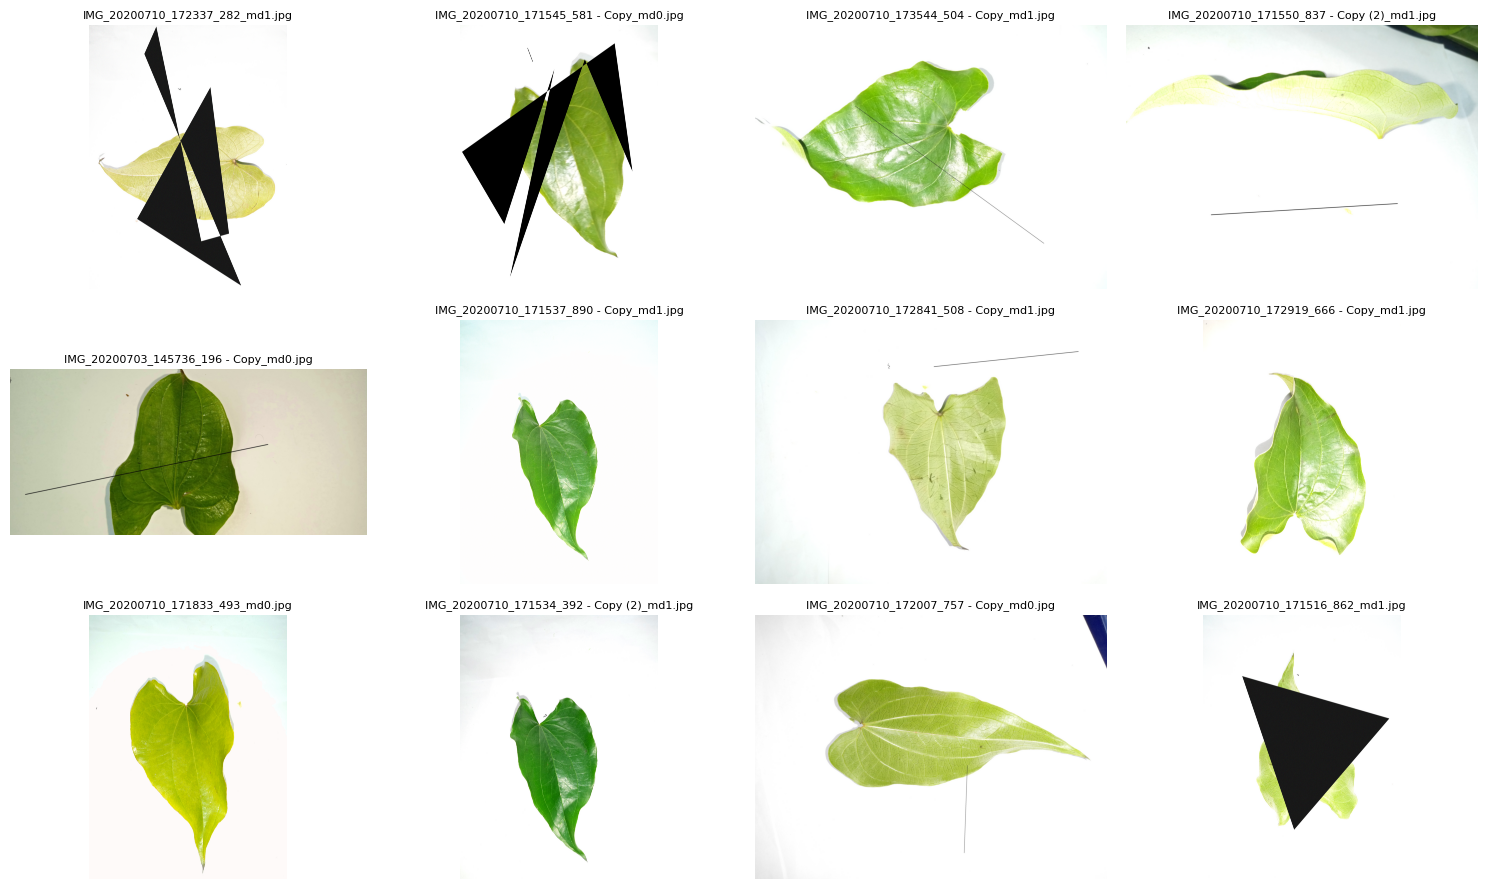

In [3]:
import matplotlib.pyplot as plt
# Specify your new folder
simulated_folder = "/content/drive/MyDrive/simulated_MD"

# How many images to display?
num_images_to_show = 12

# Get image file paths
simulated_files = glob(os.path.join(simulated_folder, "*.jpg"))

print(f"Found {len(simulated_files)} simulated MD images.")

# Pick random samples
sample_files = random.sample(simulated_files, min(num_images_to_show, len(simulated_files)))

# Plot them in a grid
cols = 4
rows = (len(sample_files) + cols - 1) // cols
plt.figure(figsize=(15, rows * 3))

for idx, img_path in enumerate(sample_files):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img_rgb)
    plt.title(os.path.basename(img_path), fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


Moving Contents

In [4]:
import os
import shutil

# Source and target folders
source_folder = "/content/drive/MyDrive/simulated_MD-sel"
target_folder = "/content/drive/My Drive/Mbajidataset6000Images/train"

# Make sure target exists
os.makedirs(target_folder, exist_ok=True)

# Loop through all files in source
for filename in os.listdir(source_folder):
    source_file = os.path.join(source_folder, filename)
    target_file = os.path.join(target_folder, filename)

    # Move file
    shutil.move(source_file, target_file)

print(f"✅ All files moved from {source_folder} → {target_folder}")

✅ All files moved from /content/drive/MyDrive/simulated_MD-sel → /content/drive/My Drive/Mbajidataset6000Images/train


# Simulating Punture using Circular and Circularly Jagged kinds of damages with a thicker line

In [2]:
# ✅ 1️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ 2️⃣ Import Libraries
import cv2
import numpy as np
import os
from glob import glob
import random
from tqdm.notebook import tqdm
import shutil

# ✅ 3️⃣ Damage Functions

def add_random_line(img):
    h, w = img.shape[:2]
    pt1 = (random.randint(0, w - 1), random.randint(0, h - 1))
    pt2 = (random.randint(0, w - 1), random.randint(0, h - 1))
    color = (0, 0, 0)
    thickness = random.randint(2, 6)
    cv2.line(img, pt1, pt2, color, thickness)
    return img

def add_random_circle(img):
    h, w = img.shape[:2]
    center = (random.randint(0, w - 1), random.randint(0, h - 1))
    radius = random.randint(5, 30)
    color = (0, 0, 0)
    cv2.circle(img, center, radius, color, -1)
    return img

def add_jagged_circle(img):
    h, w = img.shape[:2]
    center_x = random.randint(0, w - 1)
    center_y = random.randint(0, h - 1)
    radius = random.randint(10, 30)
    points = []
    num_points = random.randint(20, 40)
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        r = radius + random.randint(-5, 5)
        x = int(center_x + r * np.cos(angle))
        y = int(center_y + r * np.sin(angle))
        x = np.clip(x, 0, w - 1)
        y = np.clip(y, 0, h - 1)
        points.append([x, y])
    points = np.array(points, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(img, [points], (0, 0, 0))
    return img

def add_color_shift(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    shift = random.randint(-10, 10)
    h = hsv[..., 0].astype(int) + shift
    h = np.mod(h, 180).astype('uint8')
    s = hsv[..., 1].astype(int) + random.randint(-20, 20)
    s = np.clip(s, 0, 255).astype('uint8')
    hsv[..., 0] = h
    hsv[..., 1] = s
    img_shifted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img_shifted

def add_noise(img):
    noise = np.random.randint(0, 50, img.shape, dtype='uint8')
    img_noisy = cv2.add(img, noise)
    return img_noisy

def random_damage(img):
    if random.random() < 0.7:
        img = add_random_line(img)
    if random.random() < 0.7:
        img = add_random_circle(img)
    if random.random() < 0.7:
        img = add_jagged_circle(img)
    if random.random() < 0.5:
        img = add_color_shift(img)
    if random.random() < 0.3:
        img = add_noise(img)
    return img

# Paths & Parameters
input_folder = "/content/drive/MyDrive/Mbajidatasetnew/train/HYL"
output_folder = "/content/simulated_MD"

os.makedirs(output_folder, exist_ok=True)

num_aug_per_image = 3

# Process Images with Progress Bar & Renaming
image_files = glob(os.path.join(input_folder, "*.jpg"))
print(f"Found {len(image_files)} healthy leaf images.")

counter = 1  # start counter for naming

for fn in tqdm(image_files, desc="Generating Synthetic Puncture MD"):
    img = cv2.imread(fn)
    if img is None:
        continue
    for i in range(num_aug_per_image):
        img_aug = random_damage(img.copy())
        out_fn = os.path.join(output_folder, f"IMGC_{counter}.jpg")
        cv2.imwrite(out_fn, img_aug)
        counter += 1

print(f"Done! Synthetic MD images saved to:\n{output_folder}")

# Zip the output for download
shutil.make_archive("/content/simulated_MD", 'zip', output_folder)
print("Zipped folder: /content/simulated_MD.zip")


Mounted at /content/drive
Found 667 healthy leaf images.


Generating Synthetic Puncture MD:   0%|          | 0/667 [00:00<?, ?it/s]

Done! Synthetic MD images saved to:
/content/simulated_MD
Zipped folder: /content/simulated_MD.zip


Found 2001 simulated MD images in: /content/simulated_MD


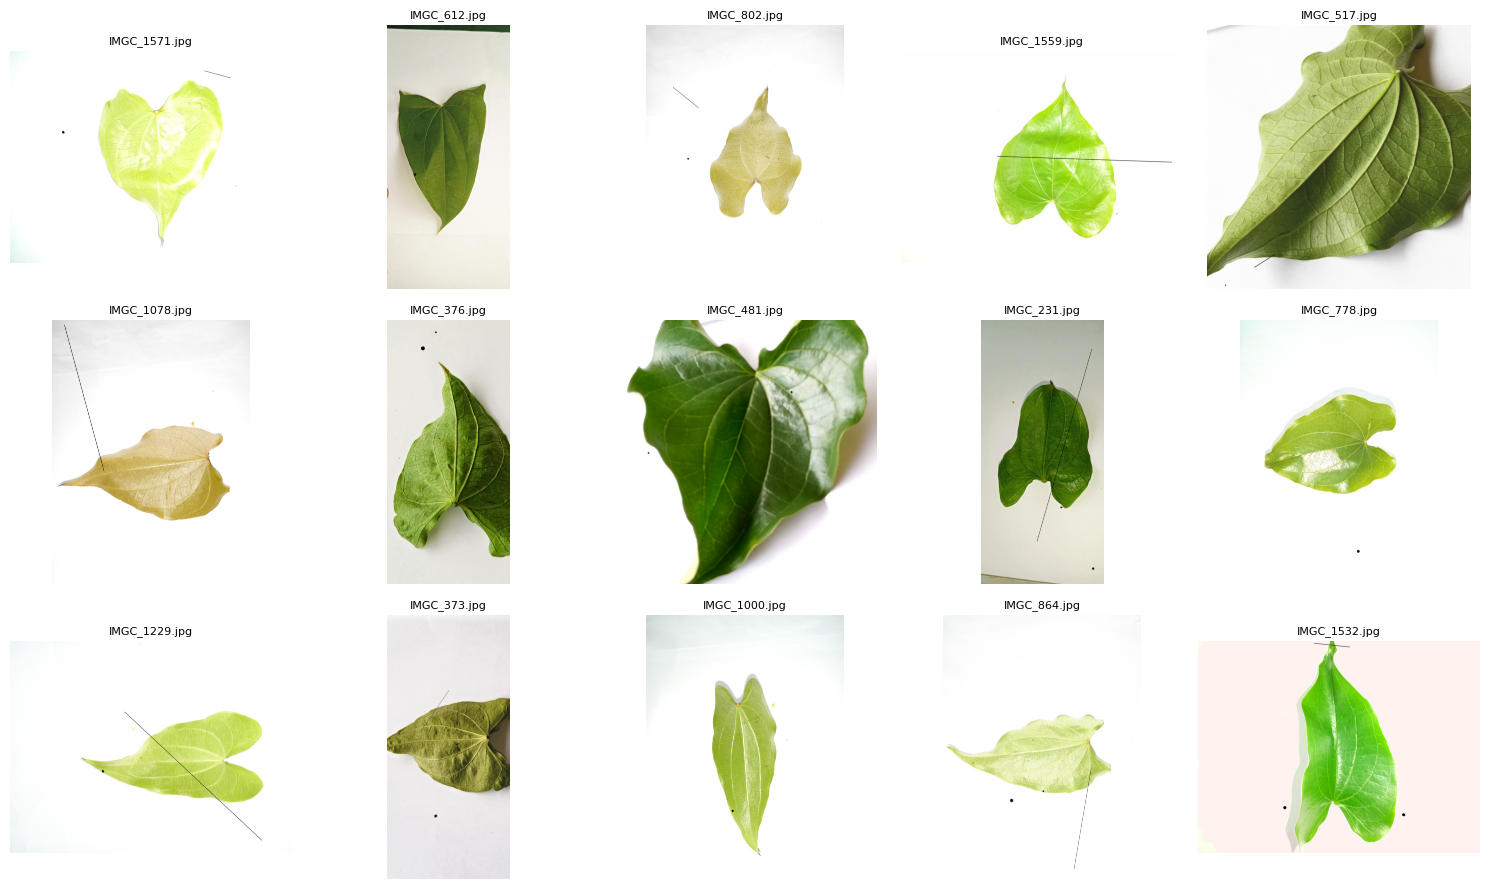

In [4]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Specify path to the LOCAL folder
simulated_folder = r"/content/simulated_MD"

# Images to display
num_images_to_show = 15

# Get image file paths
simulated_files = glob(os.path.join(simulated_folder, "*.jpg"))

print(f"Found {len(simulated_files)} simulated MD images in: {simulated_folder}")

# Pick random samples
sample_files = random.sample(simulated_files, min(num_images_to_show, len(simulated_files)))

# Plot them in a grid
cols = 5
rows = (len(sample_files) + cols - 1) // cols
plt.figure(figsize=(15, rows * 3))

for idx, img_path in enumerate(sample_files):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img_rgb)
    plt.title(os.path.basename(img_path), fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

When I visualized and manually inspected the images created by this code, I noticed something. Initially, diameter of the add_jagged_circle was fine but further down in the images, I noticed the jagged circle's diameter or the circle itself became smaller. Then, the thickness of the lines reduced as reduced further down.      

I used Train MD folder this time

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Libraries
import cv2
import numpy as np
import os
from glob import glob
import random
from tqdm.notebook import tqdm
import shutil

# Use locked parameters

# These will be defined on the first image:
JAGGED_RADIUS = None
JAGGED_POINTS = None
LINE_THICKNESS = None
CIRCLE_RADIUS = None

# Functions use locked values
def add_random_line(img):
    h, w = img.shape[:2]
    pt1 = (random.randint(0, w - 1), random.randint(0, h - 1))
    pt2 = (random.randint(0, w - 1), random.randint(0, h - 1))
    color = (0, 0, 0)
    cv2.line(img, pt1, pt2, color, LINE_THICKNESS)
    return img

def add_random_circle(img):
    h, w = img.shape[:2]
    center = (random.randint(0, w - 1), random.randint(0, h - 1))
    cv2.circle(img, center, CIRCLE_RADIUS, (0, 0, 0), -1)
    return img

def add_jagged_circle(img):
    h, w = img.shape[:2]
    center_x = random.randint(0, w - 1)
    center_y = random.randint(0, h - 1)
    radius = JAGGED_RADIUS
    points = []
    num_points = JAGGED_POINTS
    for i in range(num_points):
        angle = 2 * np.pi * i / num_points
        r = radius + random.randint(-3, 3)  # slight jaggedness
        x = int(center_x + r * np.cos(angle))
        y = int(center_y + r * np.sin(angle))
        x = np.clip(x, 0, w - 1)
        y = np.clip(y, 0, h - 1)
        points.append([x, y])
    points = np.array(points, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(img, [points], (0, 0, 0))
    return img

def add_color_shift(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    shift = random.randint(-10, 10)
    h = hsv[..., 0].astype(int) + shift
    h = np.mod(h, 180).astype('uint8')
    s = hsv[..., 1].astype(int) + random.randint(-20, 20)
    s = np.clip(s, 0, 255).astype('uint8')
    hsv[..., 0] = h
    hsv[..., 1] = s
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def add_noise(img):
    noise = np.random.randint(0, 50, img.shape, dtype='uint8')
    return cv2.add(img, noise)

def random_damage(img):
    if random.random() < 0.7:
        img = add_random_line(img)
    if random.random() < 0.7:
        img = add_random_circle(img)
    if random.random() < 0.7:
        img = add_jagged_circle(img)
    if random.random() < 0.5:
        img = add_color_shift(img)
    if random.random() < 0.3:
        img = add_noise(img)
    return img

# Paths & Parameters
input_folder = "/content/drive/MyDrive/Mbajidatasetnew/train/HYL"
output_folder = "/content/sim_jag_MD"

os.makedirs(output_folder, exist_ok=True)

# Only generate up to 20 total images
max_images = 40

# Process images with locked damage sizes
image_files = glob(os.path.join(input_folder, "*.jpg"))
print(f"Found {len(image_files)} healthy leaf images.")

counter = 1

for fn in tqdm(image_files, desc="Generating Consistent Synthetic Puncture MD"):
    img = cv2.imread(fn)
    if img is None:
        continue

    # Define locked values ON FIRST IMAGE
    if counter == 1:
        JAGGED_RADIUS = 30   # your desired radius
        JAGGED_POINTS = 40   # your desired points
        LINE_THICKNESS = 6   # thicker lines
        CIRCLE_RADIUS = 30   # same for solid circle

    if counter > max_images:
        break

    img_aug = random_damage(img.copy())
    out_fn = os.path.join(output_folder, f"IMGC_{counter}.jpg")
    cv2.imwrite(out_fn, img_aug)
    counter += 1

print(f"Done! {max_images} synthetic MD images saved to:\n{output_folder}")

# Zip for easy download
shutil.make_archive("/content/sim_jag_MD", 'zip', output_folder)
print("Zipped folder ready: /content/sim_jag_MD.zip")


Mounted at /content/drive
Found 667 healthy leaf images.


Generating Consistent Synthetic Puncture MD:   0%|          | 0/667 [00:00<?, ?it/s]

✅ Done! 40 synthetic MD images saved to:
/content/sim_jag_MD
✅ Zipped folder ready: /content/sim_jag_MD.zip
